<a href="https://colab.research.google.com/github/rafaballerini/AnaliseDaPlaylistDeRock/blob/main/An%C3%A1lise_de_m%C3%BAsicas_de_Rock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

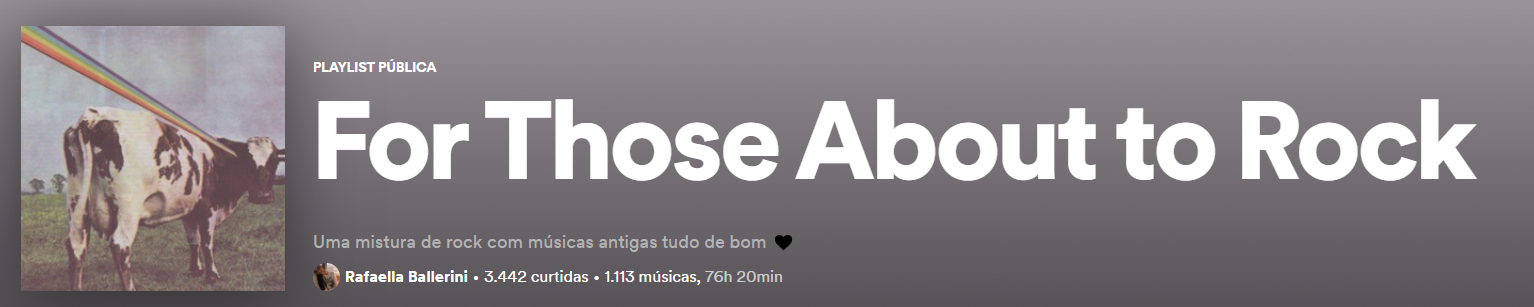

# Análise da história do rock por meio de uma playlist 🎸

Uma associação de como o rock foi se modificando desde a década de 50 até os dias de hoje e como isso pode ser observado na prática nas músicas presentes em uma playlist de rock do Spotify.

## Tecnologias utilizadas no trabalho:

1. 🐼 **Pandas:** manipulação do dataset
2. 📊 **MatPlotLib + Seaborn:** análise gráfica
3. 🧮 **Numpy:** cálculos e manipulação de arrays
4. 📐 **Scipy:** para normalização de dados
5. 🎶 **Spotipy:** para consumirmos a API do Spotify e obtermos dados da playlist
6. 📋 **CSV:** para criar um novo CSV a partir dos dados da API
7. 🗓️ **Datetime:** manipular datas
8. 💬 **Wordcloud:** análise de palavras mais frequentes




---



## 1. Instalação e importação de bibliotecas:

In [ ]:
!pip install spotipy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spotipy
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from scipy.stats import norm, skew
from wordcloud import WordCloud



---



## 2. Credenciais:

In [ ]:
spotify_details = {
    'client_id' : 'seu_client_id',
    'client_secret':'seu_client_secret',
    'redirect_uri':'https://beacons.ai/rafaballerini'}

In [ ]:
try:
  sp = spotipy.Spotify(auth_manager=spotipy.SpotifyOAuth(
          client_id=spotify_details['client_id'],
          client_secret=spotify_details['client_secret'],
          redirect_uri=spotify_details['redirect_uri'], open_browser=False))
except:
  print('Token is not accesible')

Todas essas informações você pode obter por meio do Spotify para desenvolvedores, [nesse link](https://developer.spotify.com/), criando uma nova apliação e a configurando

A **redirect URI** é o local para o qual o servidor de autorização enviará para nós quando o aplicativo for autorizado e receber um código de autorização ou token de acesso, você pode escolher a que quiser e configurar lá na sua aplicação do Spotify para Dev



---



## 3. Importando dados da playlist "For Those About to Rock":

In [ ]:
rock_playlist = sp.playlist_tracks('https://open.spotify.com/playlist/5TUxgTIxzLbLVh7RUf9V8i?si=da9e921dc4c3416d')

tracks = rock_playlist['items']
while rock_playlist['next']:
        rock_playlist = sp.next(rock_playlist)
        tracks.extend(rock_playlist['items'])

Você pode utilizar tanto o ID da playlist, quando a sua URL



---



## 4. Transformando os dados das músicas em CSV:

In [ ]:
audio_features = []
decadas = []

# década de 50
inicio_decada_50 = datetime.datetime(1950, 1, 1)
fim_decada_50 = datetime.datetime(1959, 12, 31)

# década de 60
inicio_decada_60 = datetime.datetime(1960, 1, 1)
fim_decada_60 = datetime.datetime(1969, 12, 31)

# década de 70
inicio_decada_70 = datetime.datetime(1970, 1, 1)
fim_decada_70 = datetime.datetime(1979, 12, 31)

# década de 80
inicio_decada_80 = datetime.datetime(1980, 1, 1)
fim_decada_80 = datetime.datetime(1989, 12, 31)

# década de 90
inicio_decada_90 = datetime.datetime(1990, 1, 1)
fim_decada_90 = datetime.datetime(1999, 12, 31)

# década de 2000
inicio_decada_2000 = datetime.datetime(2000, 1, 1)
fim_decada_2000 = datetime.datetime(2022, 12, 31)

def definir_decada(ano):
  if (musicas['track']['album']['release_date'] >= inicio_decada_50) and (musicas['track']['album']['release_date'] <= fim_decada_50):
      return 1950
  elif (musicas['track']['album']['release_date'] >= inicio_decada_60) and (musicas['track']['album']['release_date'] <= fim_decada_60):
      return 1960
  elif (musicas['track']['album']['release_date'] >= inicio_decada_70) and (musicas['track']['album']['release_date'] <= fim_decada_70):
      return 1970
  elif (musicas['track']['album']['release_date'] >= inicio_decada_80) and (musicas['track']['album']['release_date'] <= fim_decada_80):
      return 1980
  elif (musicas['track']['album']['release_date'] >= inicio_decada_90) and (musicas['track']['album']['release_date'] <= fim_decada_90):
      return 1990
  elif (musicas['track']['album']['release_date'] >= inicio_decada_2000) and (musicas['track']['album']['release_date'] <= fim_decada_2000):
      return 2000

# criando novo arquivo CSV e cabeçalho
with open('musicas.csv', mode = 'w') as csvfile:
  csv.writer(csvfile, delimiter=',').writerow([
        'Nome da música',
        'Nome do artista',
        'Álbum',
        'Data de lançamento do álbum',
        'Qtd músicas no álbum',
        'Duração em min',
        'Conteúdo explícito',
        'Preview da música',
        'Energia',
        'Ao vivo',
        'Acústica',
        'Instrumental',
        'Dançabilidade',
        'Volume',
        'Década'

  ])

  for musicas in tracks:

    audio_features = sp.audio_features(musicas['track']['id'])

    # obter informações detalhadas de áudio da música
    nomes_artistas = str({artista['name'] for artista in musicas['track']['artists']})
    energia = str({audio['energy'] for audio in audio_features})
    vivacidade = str({audio['liveness'] for audio in audio_features})
    acustica = str({audio['acousticness'] for audio in audio_features})
    instrumental = str({audio['instrumentalness'] for audio in audio_features})
    danca = str({audio['danceability'] for audio in audio_features})
    volume = str({audio['loudness'] for audio in audio_features})

    # remover caracteres especiais
    caracteres = '{"}'
    for i in range(0,len(caracteres)):
      nomes_artistas = nomes_artistas.replace(caracteres[i],"")
      energia = energia.replace(caracteres[i],"")
      vivacidade = vivacidade.replace(caracteres[i],"")
      acustica = acustica.replace(caracteres[i],"")
      instrumental = instrumental.replace(caracteres[i],"")
      danca = danca.replace(caracteres[i],"")
      volume = volume.replace(caracteres[i],"")

    # criação da coluna de década
    musicas['track']['album']['release_date'] = pd.to_datetime(musicas['track']['album']['release_date'])
    decada =  definir_decada(musicas['track']['album']['release_date'])   

    # escrever dados no csv
    csv.writer(csvfile, delimiter=',').writerow([
            musicas['track']['name'],
            nomes_artistas,
            musicas['track']['album']['name'], 
            musicas['track']['album']['release_date'],
            musicas['track']['album']['total_tracks'],
            musicas['track']['duration_ms'] / 60000,
            musicas['track']['explicit'],
            musicas['track']['preview_url'],
            energia,
            vivacidade,
            acustica,
            instrumental,
            danca,
            volume,
            decada
    ])

    musicas['track']['album']['release_date']

Você pode conferir [aqui](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features) a documentação da API do Spotify para compreender melhor o que significa cada uma das features


### **Informações obtidas:**
* **Nome da música**
* **Nome do artista**
* **Álbum**
* **Data de lançamento do álbum**
* **Qtd músicas no álbum**
* **Duração em min**
* **Conteúdo explícito:** se tem conteúdo +18, inadequado para crianças
* **Preview da música:** link para ouvir gratuitamente 29s da música
* **Energia:** intensidade da música
* **Ao vivo:** probabilidade de a música ter sido gravada complateia
* **Acústica:** probabilidade de a música ter sido gravada no formato acústico
* **Instrumental:** probabilidade de a música ser apenas instrumental (woah wah, esse tipo de coisa não conta como letra)
* **Dançabilidade:** o quanto a música te faz querer levantar e dançar
* **Volume**
* **Década**



---



## 5. Leitura de dados CSV:

In [ ]:
df = pd.read_csv('musicas.csv')
print('Número de músicas:', len(df.index))
df.head()

Número de músicas: 1113


,Nome da música,Nome do artista,Álbum,Data de lançamento do álbum,Qtd músicas no álbum,Duração em min,Conteúdo explícito,Preview da música,Energia,Ao vivo,Acústica,Instrumental,Dançabilidade,Volume,Década
0,Sweet Child O' Mine,Guns N' Roses,Appetite For Destruction,1987-07-21 00:00:00,12,5.908667,True,https://p.scdn.co/mp3-preview/26f96fc55eb99fff...,0.910,0.1160,0.0866,0.09960,0.454,-7.766,1980
1,Welcome To The Jungle,Guns N' Roses,Appetite For Destruction,1987-07-21 00:00:00,12,4.533767,True,https://p.scdn.co/mp3-preview/ba0aab328e995e5e...,0.954,0.2980,0.0235,0.40300,0.447,-8.069,1980
2,Paradise City,Guns N' Roses,Appetite For Destruction,1987-07-21 00:00:00,12,6.760667,True,https://p.scdn.co/mp3-preview/7ae84c42f57bf69c...,0.952,0.1420,0.0169,0.01110,0.273,-8.762,1980
3,November Rain,Guns N' Roses,Use Your Illusion I,1991-09-17 00:00:00,16,8.958433,False,NaN,0.629,0.1250,0.0165,0.27900,0.197,-9.291,1990
4,Knockin' On Heaven's Door,Guns N' Roses,Use Your Illusion II,1991-09-18 00:00:00,14,5.600000,False,NaN,0.747,0.0992,0.0203,0.00607,0.486,-7.248,1990




---



## 6. Análise dos dados:

1. Verificando dados ausentes

In [ ]:
df_ausentes = df.isnull().sum()
df_ausentes

Nome da música                   0
Nome do artista                  0
Álbum                            0
Data de lançamento do álbum      0
Qtd músicas no álbum             0
Duração em min                   0
Conteúdo explícito               0
Preview da música              362
Energia                          0
Ao vivo                          0
Acústica                         0
Instrumental                     0
Dançabilidade                    0
Volume                           0
Década                           0
dtype: int64

Apenas a coluna de `Preview da música` está com dados no formato de `NaN`, porém isso significa que não há informações sobre isso, então trocaremos todos por `none`

2. Transformando `NaN` em  `None`

In [ ]:
for col in ('Preview da música',):
  df[col] = df[col].fillna('None')
df.head()

,Nome da música,Nome do artista,Álbum,Data de lançamento do álbum,Qtd músicas no álbum,Duração em min,Conteúdo explícito,Preview da música,Energia,Ao vivo,Acústica,Instrumental,Dançabilidade,Volume,Década
0,Sweet Child O' Mine,Guns N' Roses,Appetite For Destruction,1987-07-21 00:00:00,12,5.908667,True,https://p.scdn.co/mp3-preview/26f96fc55eb99fff...,0.910,0.1160,0.0866,0.09960,0.454,-7.766,1980
1,Welcome To The Jungle,Guns N' Roses,Appetite For Destruction,1987-07-21 00:00:00,12,4.533767,True,https://p.scdn.co/mp3-preview/ba0aab328e995e5e...,0.954,0.2980,0.0235,0.40300,0.447,-8.069,1980
2,Paradise City,Guns N' Roses,Appetite For Destruction,1987-07-21 00:00:00,12,6.760667,True,https://p.scdn.co/mp3-preview/7ae84c42f57bf69c...,0.952,0.1420,0.0169,0.01110,0.273,-8.762,1980
3,November Rain,Guns N' Roses,Use Your Illusion I,1991-09-17 00:00:00,16,8.958433,False,None,0.629,0.1250,0.0165,0.27900,0.197,-9.291,1990
4,Knockin' On Heaven's Door,Guns N' Roses,Use Your Illusion II,1991-09-18 00:00:00,14,5.600000,False,None,0.747,0.0992,0.0203,0.00607,0.486,-7.248,1990


3. Análise das features numéricas

In [ ]:
numericas = df.select_dtypes(include = [np.number])
numericas.columns

Index(['Qtd músicas no álbum', 'Duração em min', 'Energia', 'Ao vivo',
       'Acústica', 'Instrumental', 'Dançabilidade', 'Volume', 'Década'],
      dtype='object')

In [ ]:
df.describe()

,Qtd músicas no álbum,Duração em min,Energia,Ao vivo,Acústica,Instrumental,Dançabilidade,Volume,Década
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,16.964061,4.115259,0.728167,0.203700,0.157142,0.051396,0.504341,-7.561604,1985.220126
std,13.664813,1.434273,0.198368,0.174148,0.224668,0.156374,0.136852,3.440227,13.747827
min,1.000000,1.088567,0.019500,0.012000,0.000003,0.000000,0.149000,-33.350000,1950.000000
25%,11.000000,3.222000,0.599000,0.090500,0.005390,0.000002,0.410000,-9.379000,1970.000000
50%,13.000000,3.925767,0.780000,0.136000,0.048500,0.000134,0.508000,-7.021000,1990.000000
75%,18.000000,4.731200,0.890000,0.271000,0.212000,0.006890,0.597000,-5.066000,2000.000000
max,186.000000,17.088000,0.992000,0.990000,0.947000,0.936000,0.942000,-1.108000,2000.000000


4. Análise das features categóricas

In [ ]:
categoricas = df.select_dtypes(include = [object])
categoricas.columns

Index(['Nome da música', 'Nome do artista', 'Álbum',
       'Data de lançamento do álbum', 'Preview da música'],
      dtype='object')

5. Alterando o tipo de dado da coluna `Data de lançamento do álbum` que não foi reconhecida como `datetime`

In [ ]:
df['Data de lançamento do álbum'] = pd.to_datetime(df['Data de lançamento do álbum'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Nome da música               1113 non-null   object        
 1   Nome do artista              1113 non-null   object        
 2   Álbum                        1113 non-null   object        
 3   Data de lançamento do álbum  1113 non-null   datetime64[ns]
 4   Qtd músicas no álbum         1113 non-null   int64         
 5   Duração em min               1113 non-null   float64       
 6   Conteúdo explícito           1113 non-null   bool          
 7   Preview da música            1113 non-null   object        
 8   Energia                      1113 non-null   float64       
 9   Ao vivo                      1113 non-null   float64       
 10  Acústica                     1113 non-null   float64       
 11  Instrumental                 1113 non-null 



---



## 7. Relacionando features de áudio:

1. Relação de `Energia` com `Dançabilidade`

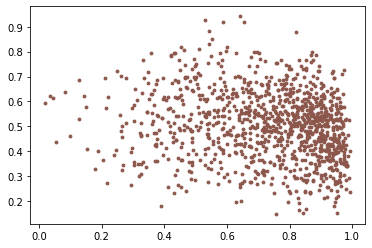

In [ ]:
plt.scatter(df['Energia'], df['Dançabilidade'], 8, color = "C5" )
plt.show()

2. Relação de `Energia` com `Volume`:

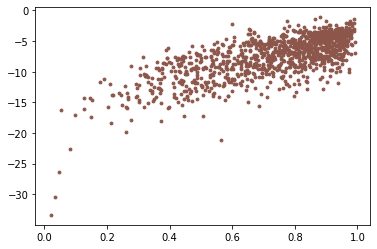

In [ ]:
plt.scatter(df['Energia'], df['Volume'], 8, color = "C5" )
plt.show()

Essas duas features se mostrarm bastante relacioandas, ou seja, provavelmente quanto mais `volume` uma música tem, provavelmente mais `energia` ela também terá

3. Relação do `Instrumental` com `Dançabilidade`:

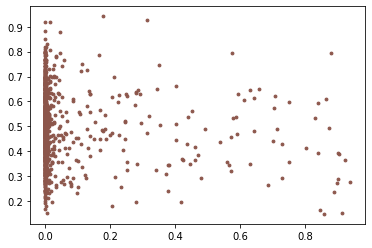

In [ ]:
plt.scatter(df['Instrumental'], df['Dançabilidade'], 8, color = "C5" )
plt.show()

4. Relação do `Volume` com `Acústica`:

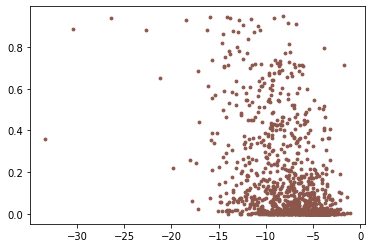

In [ ]:
plt.scatter(df['Volume'], df['Acústica'], 8, color = "C5" )
plt.show()



---



## 8. Análise gráfica das músicas por décadas:

Primeiramente faça uma [breve viagem ao longo da história do rock](https://prezi.com/view/JOvChpwcn2Ii6ogTVAWx/) para compreender a relação das informações que obtemos a partir dos dados das músicas a seguir, com o seu momento de lançamento

1. **Quantidade de músicas na playlist** por década:

In [ ]:
print('Década de 50:', (df['Década'] == 1950).sum())
print('Década de 60:', (df['Década'] == 1960).sum())
print('Década de 70:', (df['Década'] == 1970).sum())
print('Década de 80:', (df['Década'] == 1980).sum())
print('Década de 90:', (df['Década'] == 1990).sum())
print('Anos 2000:', (df['Década'] == 2000).sum())

Década de 50: 10
Década de 60: 84
Década de 70: 208
Década de 80: 216
Década de 90: 203
Anos 2000: 392


2. **Quantidade de músicas dentro dos álbums** por década:

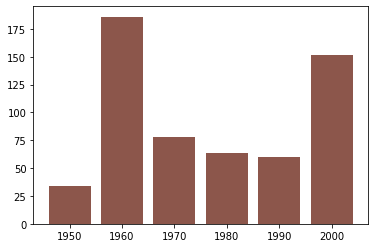

In [ ]:
plt.bar(df['Década'], df['Qtd músicas no álbum'], 8, color = "C5" )
plt.show()

3. **Duração das músicas** em cada década:

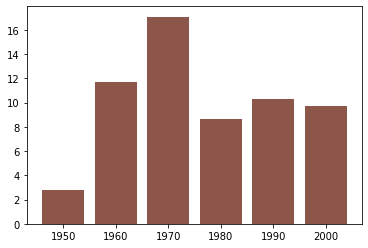

In [ ]:
plt.bar(df['Década'], df['Duração em min'], 8, color = "C5" )
plt.show()

4. **Energia** em cada década:

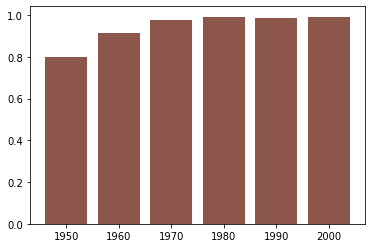

In [ ]:
plt.bar(df['Década'], df['Energia'], 8, color = "C5" )
plt.show()

5. **Ao vivo** em cada década:

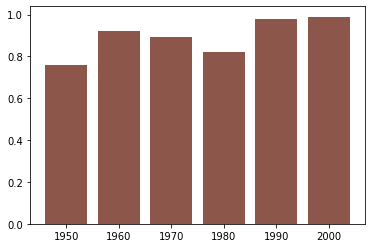

In [ ]:
plt.bar(df['Década'], df['Ao vivo'], 8, color = "C5" )
plt.show()

6. **Instrumental** em cada década:

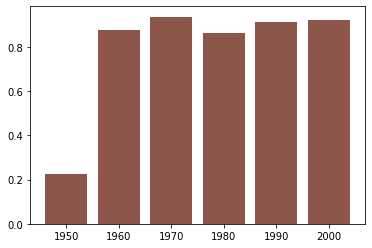

In [ ]:
plt.bar(df['Década'], df['Instrumental'], 8, color = "C5" )
plt.show()

7. **Dançabilidade** em cada década:

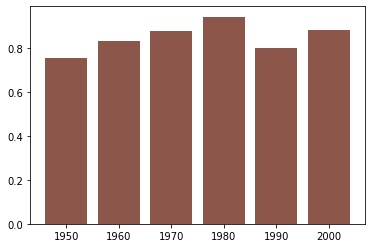

In [ ]:
plt.bar(df['Década'], df['Dançabilidade'], 8, color = "C5" )
plt.show()

8. **Volume** em cada década:

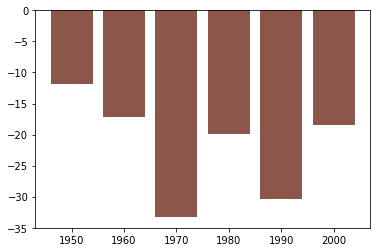

In [ ]:
plt.bar(df['Década'], df['Volume'], 8, color = "C5" )
plt.show()



---



## 9. Observando mais detalhes:

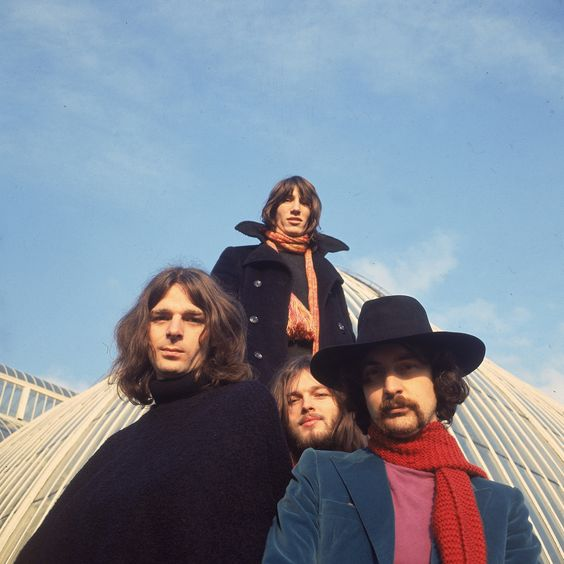

1. Pink Floyd é a banda com a música mais curta da playlist e também com a música mais longa!

In [ ]:
print(df['Nome do artista'][df['Duração em min'] == df['Duração em min'].min()])
print(df['Nome do artista'][df['Duração em min'] == df['Duração em min'].max()])

130    'Pink Floyd'
Name: Nome do artista, dtype: object
793    'Pink Floyd'
Name: Nome do artista, dtype: object


Caso você queira ouvir essas músicas, segue o preview:

[Speak to me](https://p.scdn.co/mp3-preview/6443b53cb9a92f628bc9176d8bc8e2ef28298e93?cid=d8eef4d8d1d54cc1a9deb46a37c290df): 1:05

[Dogs](https://p.scdn.co/mp3-preview/88aff779b93f13abd44ce63750b7581aa41b84ad?cid=d8eef4d8d1d54cc1a9deb46a37c290df): 17:05

2. Anos das músicas mais velha e mais recente da playlist

In [ ]:
print('Música mais velha:', df['Data de lançamento do álbum'].dt.year.min(), 'e música mais nova:', df['Data de lançamento do álbum'].dt.year.max())
velha = df[df['Data de lançamento do álbum'].dt.year == 1956]
velha

Música mais velha: 1956 e música mais nova: 2021


,Nome da música,Nome do artista,Álbum,Data de lançamento do álbum,Qtd músicas no álbum,Duração em min,Conteúdo explícito,Preview da música,Energia,Ao vivo,Acústica,Instrumental,Dançabilidade,Volume,Década
860,Blue Suede Shoes,'Elvis Presley',Elvis Presley,1956-03-23,12,1.986667,False,https://p.scdn.co/mp3-preview/b8e1ea3854aecb57...,0.660,0.138,0.654,0.000002,0.557,-7.706,1950
990,Tutti Frutti,'Elvis Presley',Elvis Presley,1956-03-23,12,1.959333,False,https://p.scdn.co/mp3-preview/a242b851d2aef3ce...,0.618,0.189,0.680,0.000000,0.635,-8.619,1950


In [ ]:
nova = df[df['Data de lançamento do álbum'].dt.year == 2021]
nova

,Nome da música,Nome do artista,Álbum,Data de lançamento do álbum,Qtd músicas no álbum,Duração em min,Conteúdo explícito,Preview da música,Energia,Ao vivo,Acústica,Instrumental,Dançabilidade,Volume,Década
1075,My Own Soul’s Warning,'The Killers',Imploding The Mirage (Deluxe),2021-01-29,13,4.574217,False,https://p.scdn.co/mp3-preview/d1531540d35b729e...,0.963,0.0820,0.00131,0.00290,0.354,-3.506,2000
1101,Last Train Home,'John Mayer',Last Train Home,2021-06-04,4,3.121817,False,None,0.850,0.0465,0.16800,0.00202,0.588,-6.431,2000


3. Palavras que mais aparecem no título das músicas:

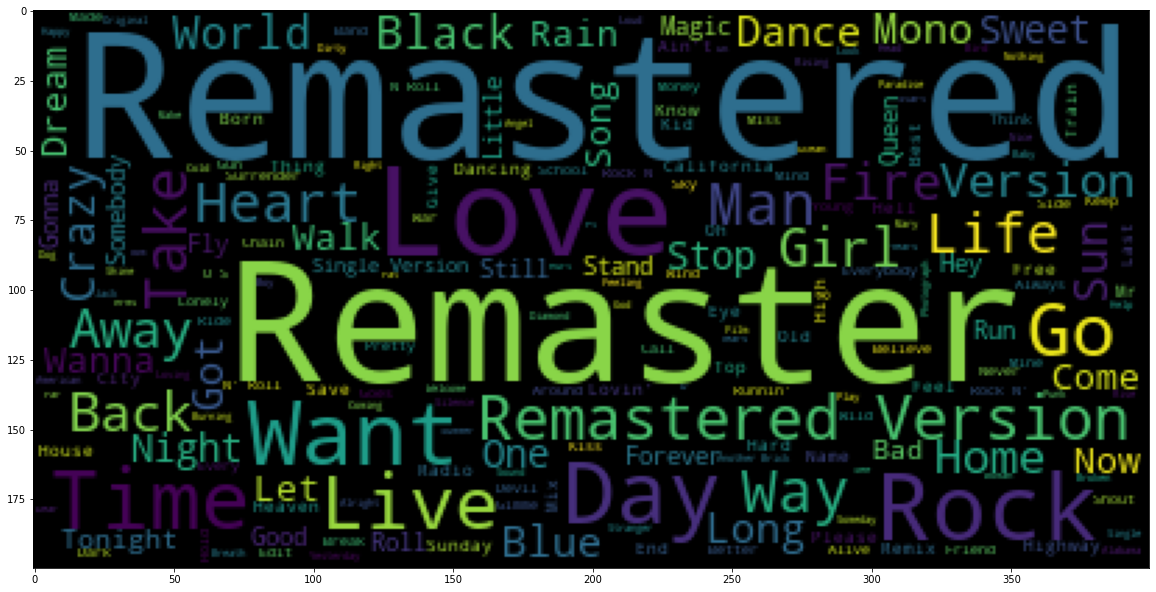

In [ ]:
lista = df['Nome da música'].tolist()
paragrafo = " ".join(lista)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(paragrafo))

Será que o rock é tão demoníaco como falam? 😂

4. Presença de conteúdo explícito nas músicas:

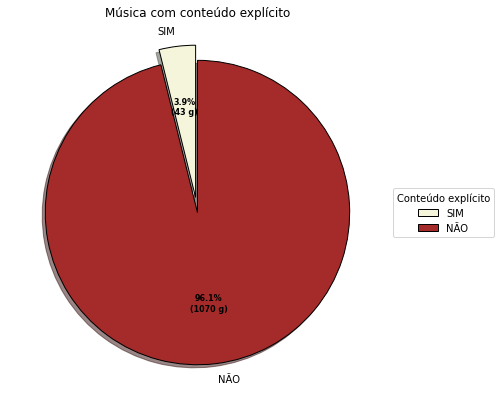

In [ ]:
# dados
legenda = ['SIM', 'NÃO']
data = [(df['Conteúdo explícito'] == True).sum(), (df['Conteúdo explícito'] == False).sum()]

# costumização do gráfico de pizza
explode = (0.1, 0.0)
colors = ("beige", "brown")
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = legenda,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
ax.legend(wedges, legenda,
          title ="Conteúdo explícito",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Música com conteúdo explícito")

plt.show()

5. Distribuição do tempo de duração das músicas:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


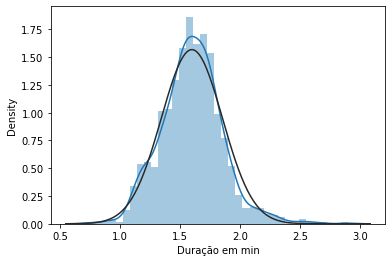

In [ ]:
df['Duração em min'] = np.log1p(df['Duração em min'])
sns.distplot(df['Duração em min'], fit=norm)
plt.show()

Na verdade esse gráfico ia longe (vimos que tem músicas de quase 20min), por isso fizemos uma normalização dos dados



---



## Curiosidade: 

Vocês sabiam que hoje a banda **Metallica** utiliza dados do Spotify de seus ouvintes para definir a setlist de cada show que fará em cada cidade?
[Veja a publicação do assunto no Linkedin](https://www.linkedin.com/feed/update/urn:li:activity:6974882529556226048/?commentUrn=urn%3Ali%3Acomment%3A(activity%3A6974882529556226048%2C6975060722330267649)&dashCommentUrn=urn%3Ali%3Afsd_comment%3A(6975060722330267649%2Curn%3Ali%3Aactivity%3A6974882529556226048))

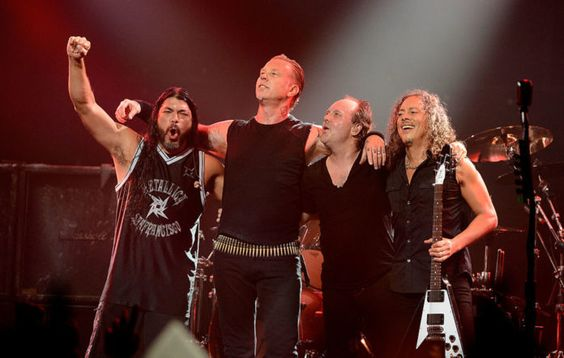



---



## Fontes:

[História do Rock](https://i.pinimg.com/originals/e6/78/8f/e6788f017f9ebe77ab945f5f24be9461.jpg)

[Imagens utilizadas](https://br.pinterest.com/)

[Curiosidade](https://www.linkedin.com/feed/update/urn:li:activity:6974882529556226048/?commentUrn=urn%3Ali%3Acomment%3A(activity%3A6974882529556226048%2C6975060722330267649)&dashCommentUrn=urn%3Ali%3Afsd_comment%3A(6975060722330267649%2Curn%3Ali%3Aactivity%3A6974882529556226048))
